BRAIN STROKE PREDICTION ANALYSIS 

Our top priority in this health problem is to identify patients with stroke.

According to the World Health Organization (WHO), stroke is a significant global health concern and a leading cause of death and disability worldwide. It primarily occurs when the blood supply to the brain is interrupted or reduced, leading to oxygen deprivation and damage to brain cells. WHO emphasizes stroke prevention, early detection, and management as critical steps to reduce its impact.

This dataset is used to predict whethere the patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.

Attribute Information:

# stroke_prediction
Synthetically generated dataset containing Stroke Prediction metrics

A dataset containing all the required fields to build robust AI/ML models to detect Stroke

5110 rows × 12 columns of stroke prediction dataset, containing:

1. 'ID',
2. 'Gender',
3. 'Age',
4. 'Hypertension',
5. 'Heart Disease',
6. 'Ever_Married',
7. 'Work Type',
8. 'Residence Type',
9. 'Average Glucose Level',
10. 'Body Mass Index (BMI)',
11. 'Smoking Status',
12. 'Stroke'.

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Capstone Project\healthcare_stroke_dataset.csv")

In [3]:
#Get the look into the column of the data and size of the data
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df = df.drop(['id'], axis=1)#dropping the column 'id'

In [6]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Stroke is the target column here and we will predict stroke based on the features like gender, age, hypertension, heart disease, ever married, work type,Residence type,avg glucose_level, BMI, and smoking status.

In [7]:
df['stroke'].unique()

array([1, 0], dtype=int64)

It is a binary classification machine learning problem where we will predict whether the stroke is likely to occur or not.

In [8]:
#Get the information on the data columns, size, non-null value count, and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [10]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
#Checking null values in the data
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
df.isnull().mean()*100 #Used to calculate the percentage of missing (null) values in each column of a DataFrame

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [14]:


# Convert categorical variables to numeric using one-hot encoding or label encoding
df_encoded = pd.get_dummies(df, drop_first=True)


In [15]:
from sklearn.impute import KNNImputer

# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values
df_imputed = imputer.fit_transform(df_encoded)

# Convert the imputed array back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df_encoded.columns)

# Replace the original BMI column with the imputed values
df["bmi"] = df_imputed["bmi"]

# Check the result
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level    bmi   smo

In [16]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Now, this dataframe has no null values.

Data Visualization/EDA

In [17]:
df['stroke'].unique()

array([1, 0], dtype=int64)

In [18]:
y=df['stroke']
y.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [19]:
y= df['stroke']
y.value_counts(normalize=True)*100


stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

In [20]:
import plotly.express as px
px.bar(x=y.value_counts().index, y=y.value_counts(), color=y.value_counts().index)

In [21]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
df[numerical_features].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.939002
std,22.612647,45.283560,7.763201
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.700000
50%,45.000000,91.885000,28.200000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [22]:
#selected features
X_df = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]
X_df.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.60,1
1,61.0,0,0,202.21,32.56,1
2,80.0,0,1,105.92,32.50,1
3,49.0,0,0,171.23,34.40,1
4,79.0,1,0,174.12,24.00,1


In [23]:
X_df.shape

(5110, 6)

In [24]:
X_df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [25]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                5110 non-null   float64
 5   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 239.7 KB


In [26]:
X_df.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

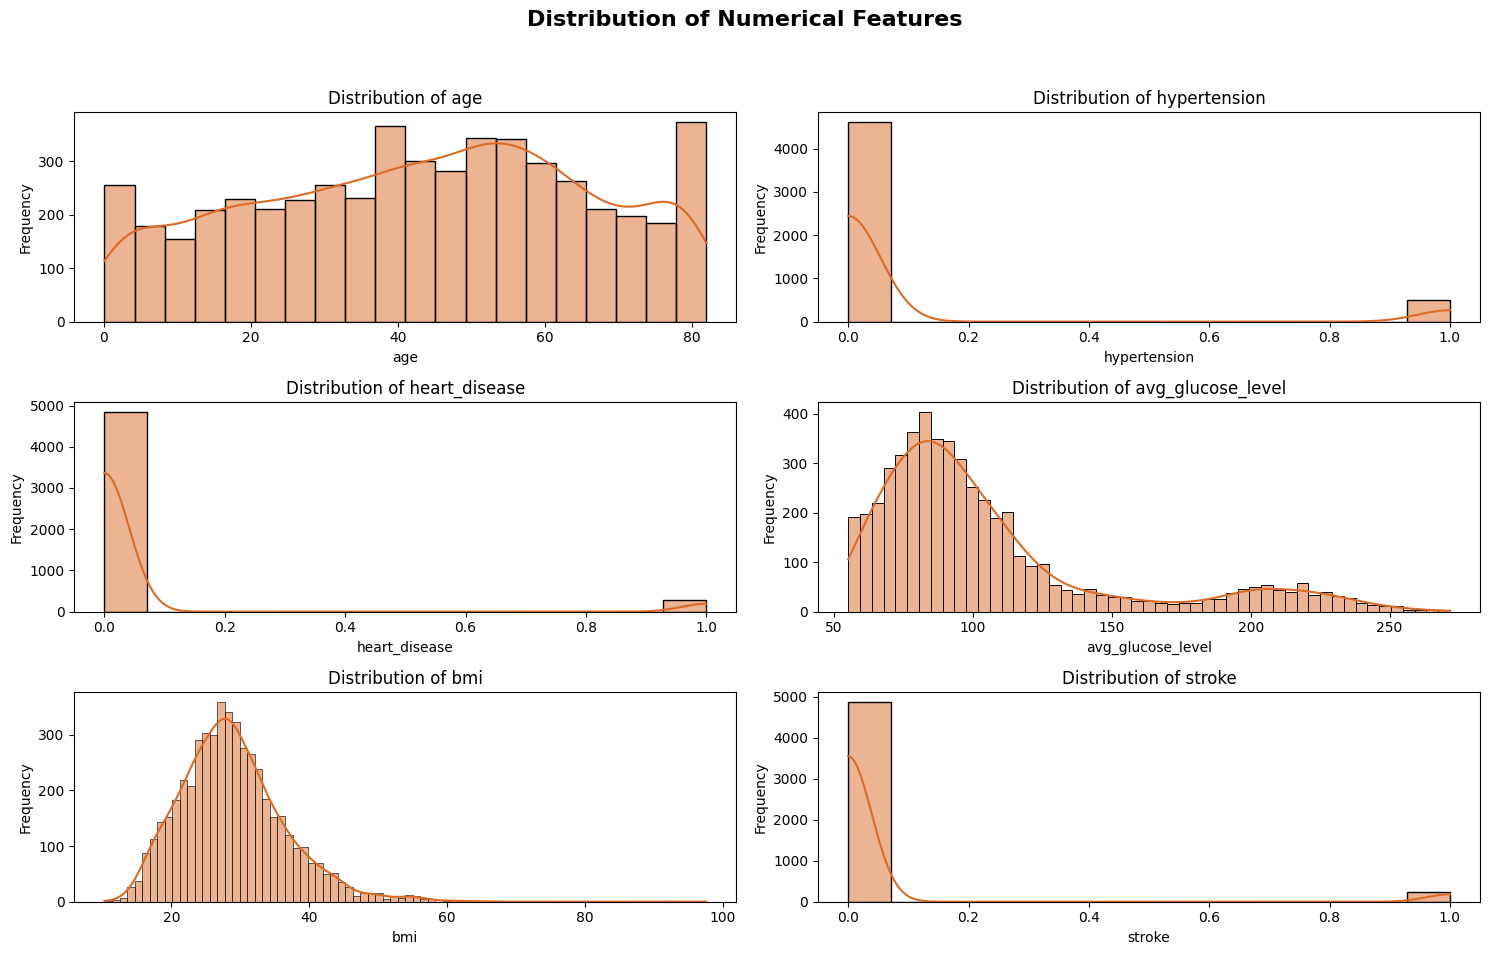

In [27]:
numerical_features = X_df.select_dtypes(include="number").columns
plt.figure(figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features", fontsize=16, fontweight="bold")
for i in range(len(numerical_features)):
    plt.subplot(3, 2, i + 1)
    sns.histplot(X_df[numerical_features[i]], kde=True, color="#DB6B25")
    plt.title(f"Distribution of {numerical_features[i]}")
    plt.xlabel(numerical_features[i])
    plt.ylabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [28]:
# skew valus
X_df.skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.041794
stroke               4.193284
dtype: float64

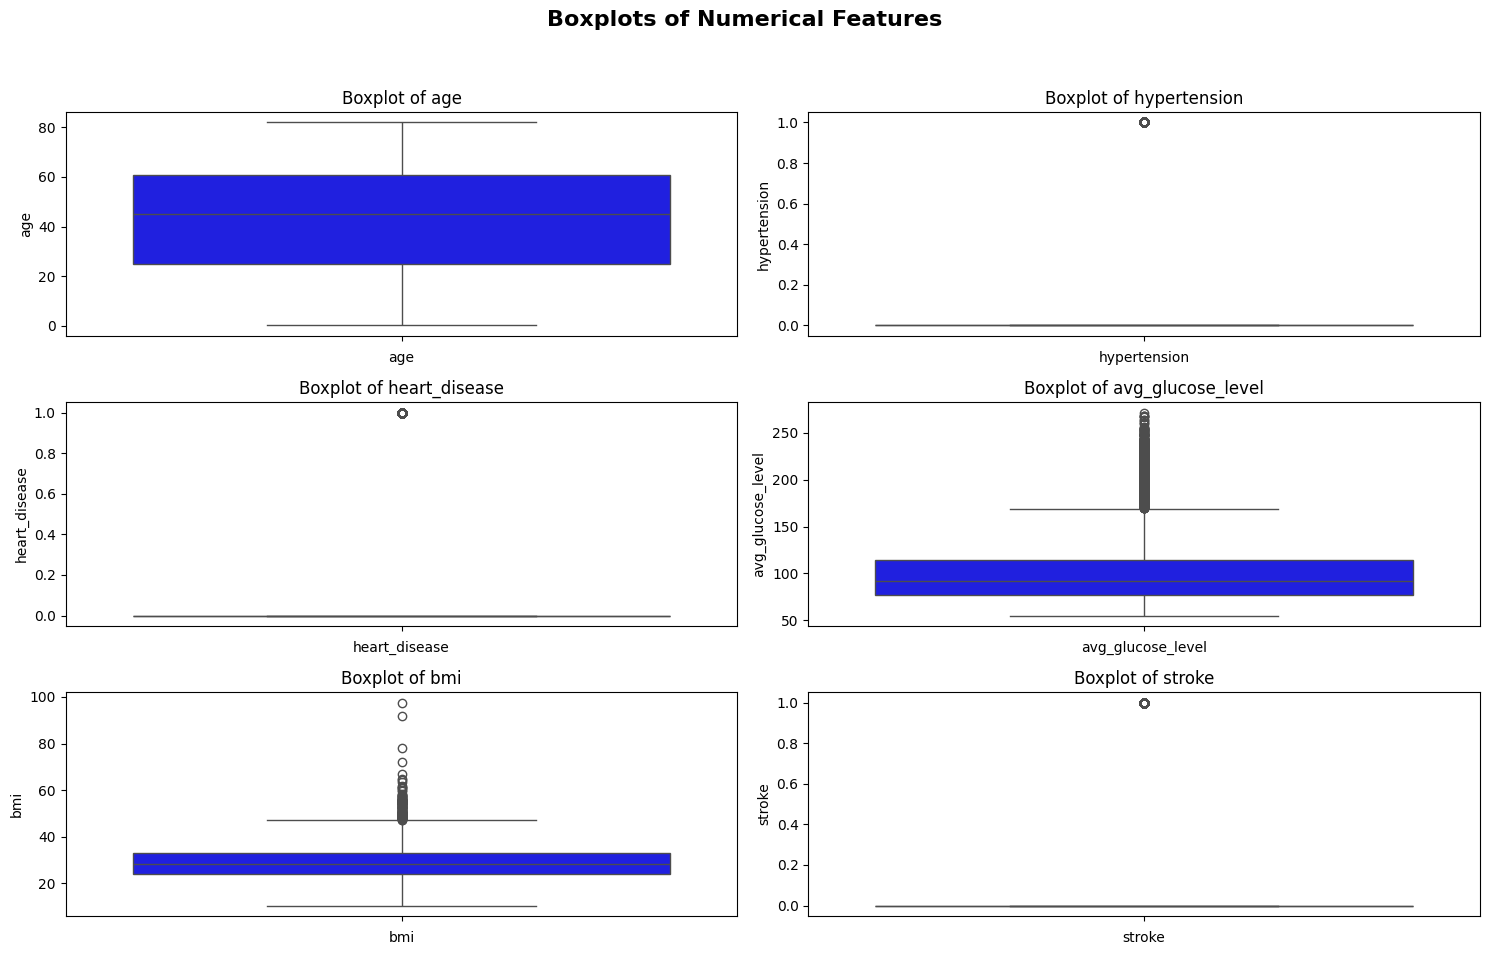

In [29]:
numerical_features = X_df.select_dtypes(include="number").columns
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplots of Numerical Features", fontsize=16, fontweight="bold")
for i in range(len(numerical_features)):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(X_df[numerical_features[i]], color="blue")
    plt.title(f"Boxplot of {numerical_features[i]}")
    plt.xlabel(numerical_features[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

#removing the outliers using Z-Score method


# Specify features to check for outliers

features_outliers = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Calculate Z-scores for the specified features
z_scores = np.abs(zscore(df[features_outliers]))

# Set the threshold for Z-scores

threshold = 4

# Filter rows where all specified features are within the threshold
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

# Print results
print("Data after removing outliers using Z-score:")
print(df_no_outliers)


Data after removing outliers using Z-score:
      gender   age  hypertension  heart_disease ever_married      work_type  \
1     Female  61.0             0              0          Yes  Self-employed   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
5       Male  81.0             0              0          Yes        Private   
7     Female  69.0             0              0           No        Private   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Re

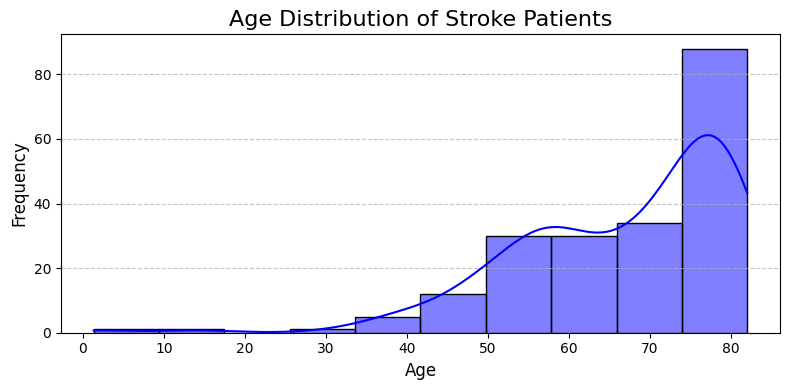

In [31]:
#Let's have a look on the distribution of stroke patient's age :

#Stroke Patient's Age
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for stroke patients
stroke_patients = df_no_outliers[df_no_outliers['stroke'] == 1]

# Plotting the distribution
plt.figure(figsize=(8, 4))
sns.histplot(stroke_patients['age'], kde=True, bins=10, color='blue', edgecolor='black')
plt.title('Age Distribution of Stroke Patients', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Insights:

1. We can see the stroke patient's age distribution is left skewed.
2. Most of the patients fall in between 60 years to 82 years.
3. Also there are some young and children female stroke patients too.

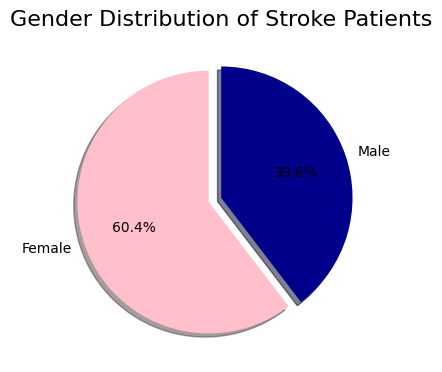

In [32]:
#Stroke Patient's Gender

# Filter for stroke patients
stroke_patients = df_no_outliers[df_no_outliers['stroke'] == 1]

# Count the occurrences of each gender
gender_counts = stroke_patients['gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['pink', 'darkblue'],
    explode=[0.1, 0],  # Highlight one slice
    shadow=True
)
plt.title("Gender Distribution of Stroke Patients", fontsize=16)
plt.tight_layout()
plt.show()

In [33]:
import plotly.express as px

fig = px.histogram(df_no_outliers, x='hypertension', width=400)
fig.show()

In [34]:
round(df_no_outliers[df_no_outliers['hypertension']==1]['stroke'].mean()*100, 2)#percentage of people with hypertension likely to get stroke

12.35

In [35]:
round(df_no_outliers[df_no_outliers['hypertension']==0]['stroke'].mean()*100, 2)#percentage of people with no hypertension likely to get stroke

3.39

In [36]:
fig = px.histogram(df_no_outliers, x='heart_disease', width=400)
fig.show()

In [37]:
stroke_percentages_work_type = df_no_outliers.groupby('work_type')['stroke'].mean()*100
stroke_percentages_work_type.sort_values(ascending = False)

work_type
Self-employed    7.598372
Private          4.283122
Govt_job         4.186795
children         0.291545
Never_worked     0.000000
Name: stroke, dtype: float64

This implies person who is self-employed has higher chance of getting stroke.

In [38]:
fig = px.histogram(df_no_outliers, x='Residence_type', width=400)
fig.show()

In [39]:
stroke_percentages_work_type = df_no_outliers.groupby('Residence_type')['stroke'].mean()*100
stroke_percentages_work_type.sort_values(ascending = False)

Residence_type
Urban    4.409963
Rural    3.962901
Name: stroke, dtype: float64

Urban people have a bit higher chance to get stroke.

In [40]:
fig = px.histogram(df_no_outliers, x='smoking_status', width=400)
fig.show()

In [41]:
stroke_percentages_work_type = df_no_outliers.groupby('smoking_status')['stroke'].mean()*100
stroke_percentages_work_type.sort_values(ascending = False)

smoking_status
formerly smoked    7.178218
never smoked       4.340568
smokes             3.729282
Unknown            2.613941
Name: stroke, dtype: float64

People who have formerly smoked has higher chance of  getting stroke.

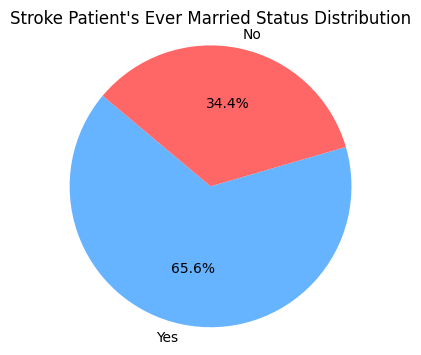

In [42]:
# Data for 'ever_married' status
labels = ['Yes', 'No']
sizes = [3353, 1757]  # Count of 'Yes' and 'No'
colors = ['#66b3ff', '#ff6666']

# Create pie chart
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Stroke Patient\'s Ever Married Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Display the pie chart
plt.show()


In [43]:
round(df_no_outliers[df_no_outliers['ever_married']=='Yes']['stroke'].mean()*100, 2)#percentage of people with married status likely to get stroke

5.81

In [44]:
round(df_no_outliers[df_no_outliers['ever_married']=='No']['stroke'].mean()*100, 2)#percentage of people with unmarried status likely to get stroke

1.28

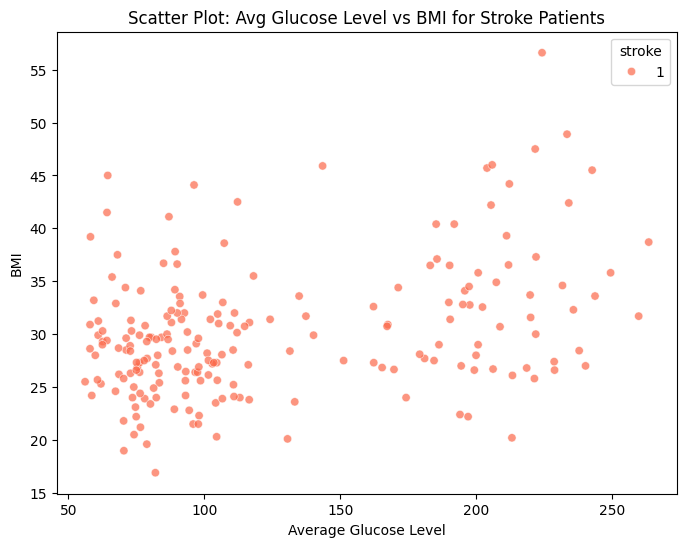

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for individuals likely to get a stroke
stroke_data = df_no_outliers[df_no_outliers['stroke'] == 1]

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=stroke_data,
    x='avg_glucose_level',
    y='bmi',
    hue='stroke',  # Optional: hue indicates stroke (though all are stroke == 1 here)
    palette='Reds',
    alpha=0.7
)

# Add labels and title
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.title('Scatter Plot: Avg Glucose Level vs BMI for Stroke Patients')

# Display the plot
plt.show()


In [46]:
df_no_outliers

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,32.56,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.00,formerly smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.80,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,27.84,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


In [47]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4821 entries, 1 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4821 non-null   object 
 1   age                4821 non-null   float64
 2   hypertension       4821 non-null   int64  
 3   heart_disease      4821 non-null   int64  
 4   ever_married       4821 non-null   object 
 5   work_type          4821 non-null   object 
 6   Residence_type     4821 non-null   object 
 7   avg_glucose_level  4821 non-null   float64
 8   bmi                4821 non-null   float64
 9   smoking_status     4821 non-null   object 
 10  stroke             4821 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 452.0+ KB


In [48]:
objects_columns = df.select_dtypes(include = 'object').columns #selecting object dtypes

In [49]:
objects_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [50]:
# Filter the dataset to include only numerical columns
numerical_df_no_outliers = df_no_outliers.select_dtypes(include=['number'])

# Display the dataset with only numerical columns
print(numerical_df_no_outliers)


       age  hypertension  heart_disease  avg_glucose_level    bmi  stroke
1     61.0             0              0             202.21  32.56       1
3     49.0             0              0             171.23  34.40       1
4     79.0             1              0             174.12  24.00       1
5     81.0             0              0             186.21  29.00       1
7     69.0             0              0              94.39  22.80       1
...    ...           ...            ...                ...    ...     ...
5105  80.0             1              0              83.75  27.84       0
5106  81.0             0              0             125.20  40.00       0
5107  35.0             0              0              82.99  30.60       0
5108  51.0             0              0             166.29  25.60       0
5109  44.0             0              0              85.28  26.20       0

[4821 rows x 6 columns]


In [53]:


df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4821 entries, 1 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4821 non-null   object 
 1   age                4821 non-null   float64
 2   hypertension       4821 non-null   int64  
 3   heart_disease      4821 non-null   int64  
 4   ever_married       4821 non-null   object 
 5   work_type          4821 non-null   object 
 6   Residence_type     4821 non-null   object 
 7   avg_glucose_level  4821 non-null   float64
 8   bmi                4821 non-null   float64
 9   smoking_status     4821 non-null   object 
 10  stroke             4821 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 452.0+ KB


Correlation Map

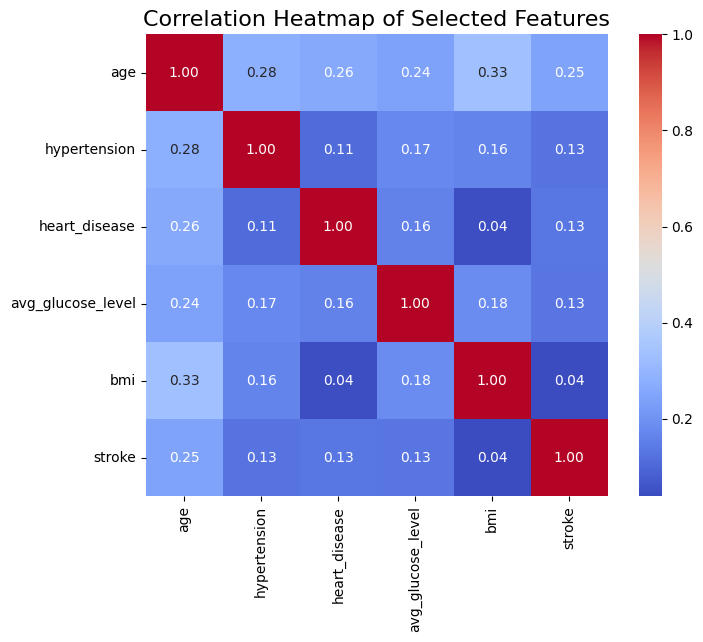

In [54]:
#Correlation heatmap between numerical columns

import pandas as pd

#Selected all the feature columns
features_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
                 'stroke']
df_features = df[features_cols]

# Compute the correlation matrix
correlation_matrix = df_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate the heatmap
sns.heatmap(correlation_matrix, 
            annot=True,         # Annotate with correlation values
            fmt=".2f",          # Format for the numbers
            cmap="coolwarm",    # Color map
            cbar=True,          # Display color bar
            square=True)        # Make the heatmap square

# Add a title to the heatmap
plt.title('Correlation Heatmap of Selected Features', fontsize=16)

# Show the heatmap
plt.show()

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Feature Scaling

features_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level','bmi']#numerical columns
scaler = StandardScaler()
df_no_outliers[features_columns] = scaler.fit_transform(df_no_outliers[features_columns])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7520\1064139192.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
df_no_outliers[features_columns]

,age,hypertension,heart_disease,avg_glucose_level,bmi
1,0.862156,-0.312534,0.0,2.252319,0.503075
3,0.323302,-0.312534,0.0,1.538893,0.745929
4,1.670439,3.199650,0.0,1.605446,-0.626725
5,1.760248,-0.312534,0.0,1.883862,0.033205
7,1.221393,-0.312534,0.0,-0.230624,-0.785108
...,...,...,...,...,...
5105,1.715343,3.199650,0.0,-0.475648,-0.119899
5106,1.760248,-0.312534,0.0,0.478887,1.485051
5107,-0.305362,-0.312534,0.0,-0.493150,0.244382
5108,0.413111,-0.312534,0.0,1.425132,-0.415548


In [57]:
print(df_no_outliers['stroke'].unique())


[1 0]


In [58]:
df_no_outliers['stroke'].value_counts()

stroke
0    4619
1     202
Name: count, dtype: int64

In [59]:
df_no_outliers['stroke'].value_counts(normalize=True)*100

stroke
0    95.809998
1     4.190002
Name: proportion, dtype: float64

In [60]:
#Separate dependent and independent features

y = df_no_outliers['stroke']  # Target variable
X = df_no_outliers.drop('stroke', axis=1)  # Features


In [61]:
print (X.shape)
print(y.shape)

(4821, 10)
(4821,)


In [62]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

skew_remove = ['avg_glucose_level']
imput_col = ['bmi']
scale_col = X.select_dtypes(include="number").columns.difference(skew_remove + imput_col)

transform_col = Pipeline(steps=[
    ('power', PowerTransformer(method='yeo-johnson')),
])

scaled_pipeline = Pipeline(steps=[
    ('scale', StandardScaler()),
])

impute = Pipeline(steps=[
    ('impute', KNNImputer(n_neighbors=5)),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('impute', impute, imput_col),
        ('skew_remove', transform_col, skew_remove),
        ('scale', scaled_pipeline, scale_col)
    ]
)

print(preprocessor)

ColumnTransformer(transformers=[('impute',
                                 Pipeline(steps=[('impute', KNNImputer())]),
                                 ['bmi']),
                                ('skew_remove',
                                 Pipeline(steps=[('power',
                                                  PowerTransformer())]),
                                 ['avg_glucose_level']),
                                ('scale',
                                 Pipeline(steps=[('scale', StandardScaler())]),
                                 Index(['age', 'heart_disease', 'hypertension'], dtype='object'))])


In [63]:
X_transfomed = preprocessor.fit_transform(X)
X_transfomed.shape

(4821, 5)

In [64]:
import pickle
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

In [65]:
from imblearn.combine import SMOTEENN


smt = SMOTEENN()
X_resampled, y_resampled = smt.fit_resample(X_transfomed, y.values)
X_resampled.shape, y_resampled.shape

((7490, 5), (7490,))

In [66]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    return acc, f1 , precision, recall, roc_auc

In [67]:
def evaluate_models(X, y, models, params):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models_list = []
    accuracy_list = []
    f1_list = []
    precision_list = []
    recall_list = []
    auc_list = []
    best_model = None
    best_score = 0

    for i in tqdm_notebook(range(len(list(models)))):
        model = list(models.values())[i]
        para = params[list(models.keys())[i]]

        gs = GridSearchCV(model, para, cv=3, refit=True, verbose=2)
        gs.fit(X_train, y_train)

        best_params = gs.best_params_
        model.set_params(**best_params)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        model_train_accuracy, model_train_f1, model_train_precision, \
        model_train_recall, model_train_rocauc_score = evaluate_clf(y_train, y_train_pred)

        model_test_accuracy, model_test_f1, model_test_precision, \
        model_test_recall, model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)

        models_list.append(list(models.keys())[i])
        accuracy_list.append(model_test_accuracy)
        f1_list.append(model_test_f1)
        precision_list.append(model_test_precision)
        recall_list.append(model_test_recall)
        auc_list.append(model_test_rocauc_score)

        print(f"Model: {list(models.keys())[i]}")
        print("Model performance for Training set")
        print(f"- Accuracy: {model_train_accuracy:.4f}")
        print(f"- F1 score: {model_train_f1:.4f}")
        print(f"- Precision: {model_train_precision:.4f}")
        print(f"- Recall: {model_train_recall:.4f}")
        print(f"- ROC AUC Score: {model_train_rocauc_score:.4f}")
        print("----------------------------------")
        print("Model performance for Test set")
        print(f"- Accuracy: {model_test_accuracy:.4f}")
        print(f"- F1 score: {model_test_f1:.4f}")
        print(f"- Precision: {model_test_precision:.4f}")
        print(f"- Recall: {model_test_recall:.4f}")
        print(f"- ROC AUC Score: {model_test_rocauc_score:.4f}")
        print("=" * 35)
        print("\n")

        if model_test_rocauc_score > best_score:
            best_score = model_test_rocauc_score
            best_model = model
    if best_model is not None:
        with open("best_model.pkl", "wb") as f:
            pickle.dump(best_model, f)
        print(f"Best model saved to 'best_model.pkl' with ROC AUC Score: {best_score:.4f}")

    report = pd.DataFrame(
        list(zip(models_list, accuracy_list, f1_list, precision_list, recall_list, auc_list)),
        columns=['Model Name', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC Score']
    ).sort_values(by=['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC Score'], ascending=False)

    return report


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LGBMClassifier': LGBMClassifier()
}

param_grids = {
    'LogisticRegression': {
        "class_weight":["balanced"],
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'min_samples_split': [2]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1]
    },
    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2]
    },
    'LGBMClassifier': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 63]
    }
}

In [69]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from tqdm.notebook import tqdm_notebook

report = evaluate_models(X_resampled, y_resampled, models, param_grids)

  0%|          | 0/6 [00:00<?, ?it/s]

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight=balanced, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, class_weight=balanced, penalty=l2, solver

c:\Users\Lenovo\.ms-ad\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.2s


c:\Users\Lenovo\.ms-ad\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s


c:\Users\Lenovo\.ms-ad\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.2s


c:\Users\Lenovo\.ms-ad\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s


c:\Users\Lenovo\.ms-ad\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s


c:\Users\Lenovo\.ms-ad\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s


c:\Users\Lenovo\.ms-ad\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.2s


c:\Users\Lenovo\.ms-ad\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.2s


c:\Users\Lenovo\.ms-ad\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.2s


c:\Users\Lenovo\.ms-ad\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.6s


c:\Users\Lenovo\.ms-ad\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.6s


c:\Users\Lenovo\.ms-ad\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.6s


c:\Users\Lenovo\.ms-ad\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\Lenovo\.ms-ad\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Model: AdaBoostClassifier
Model performance for Training set
- Accuracy: 0.8777
- F1 score: 0.8923
- Precision: 0.8422
- Recall: 0.9487
- ROC AUC Score: 0.8725
----------------------------------
Model performance for Test set
- Accuracy: 0.8825
- F1 score: 0.8924
- Precision: 0.8479
- Recall: 0.9419
- ROC AUC Score: 0.8804


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_s

In [70]:
report

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score
5,LGBMClassifier,0.983979,0.984674,0.974716,0.994839,0.983588
1,RandomForestClassifier,0.973298,0.974490,0.963430,0.985806,0.972848
2,GradientBoostingClassifier,0.967290,0.968610,0.961832,0.975484,0.966995
4,DecisionTreeClassifier,0.954606,0.956186,0.954955,0.957419,0.954505
3,AdaBoostClassifier,0.882510,0.892421,0.847851,0.941935,0.880373
0,LogisticRegression,0.869159,0.879162,0.841795,0.920000,0.867331


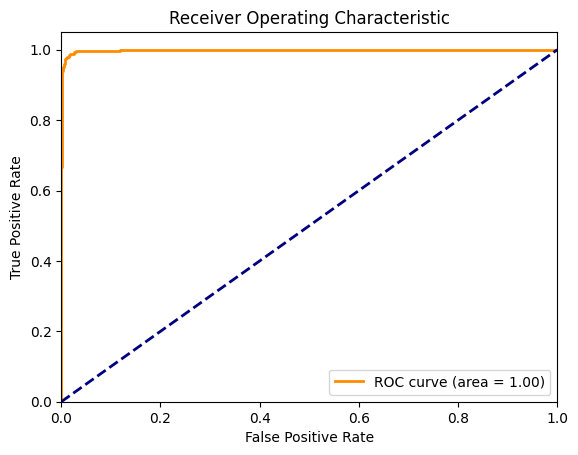

In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

y_pred_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [72]:
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

file_path = "C:\\Users\\Lenovo\\OneDrive\\Documents\\Capstone Project\\preprocessor.pkl"

with open(file_path, 'rb') as f:
    preprocess = pickle.load(f)


input_data = (75, 0, 1, 109.78, 36.6)

input_df = pd.DataFrame([input_data], columns=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'])

input_data_std = preprocess.transform(input_df)

prediction = best_model.predict(input_data_std)
print(prediction)

if(prediction[0] == 0):
    print('no stroke')
else:
    print('stroke')


[0]
no stroke


**Predict the first 10 predictions**

In [76]:
import pandas as pd
#Predict the first 10 predictions

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the LightGBM model
lgbm_model = LGBMClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred = lgbm_model.predict(X_test)

# Convert y_test to a pandas Series
y_test_series = pd.Series(y_test)  #y_test converted to pandas series

# Display the first 10 actual and predicted values
print("First 10 Actual vs Predicted Stroke Predictions:")
comparison = pd.DataFrame({
    'Actual': y_test_series.iloc[:10].values,
    'Predicted': y_pred[:10]
})
print(comparison)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


[LightGBM] [Info] Number of positive: 3200, number of negative: 2792
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 5992, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534045 -> initscore=0.136393
[LightGBM] [Info] Start training from score 0.136393
First 10 Actual vs Predicted Stroke Predictions:
   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       0          0
5       0          0
6       1          1
7       1          1
8       0          0
9       1          1

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       723
           1       0.96      0.99      0.97       775

    accuracy                 

**Deep Learning**

In [106]:
import tensorflow as tf
from tensorflow import keras

Create Neural Network
1. Creating sequential ANN Network
2. Creating 5 Layers Network
3, Activation function is 'ReLU.'
4. Last layer is output layer.
5. Problem is binary function so used output node as 1 and activation is 'sigmoid.'

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), #input layer
    
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),  #hidden layer
    Dense(32, activation='relu'),
    
    Dense(1, activation='sigmoid')  #output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
train = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2)



c:\Users\Lenovo\.ms-ad\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6922 - loss: 0.5979 - val_accuracy: 0.8068 - val_loss: 0.4320
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8166 - loss: 0.4076 - val_accuracy: 0.8277 - val_loss: 0.4076
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8115 - loss: 0.4029 - val_accuracy: 0.8230 - val_loss: 0.3932
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8251 - loss: 0.3820 - val_accuracy: 0.8393 - val_loss: 0.3749
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8412 - loss: 0.3539 - val_accuracy: 0.8277 - val_loss: 0.3814
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8370 - loss: 0.3599 - val_accuracy: 0.8462 - val_loss: 0.3501
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8605 - loss: 0.3175 - val_accuracy: 0.8385 - val_loss: 0.3559
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8685 - loss: 0.3067 - val_accuracy: 0.8547 - 

In [108]:
model.evaluate(X_test, y_test)



87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9201 - loss: 0.3195


[0.2790597081184387, 0.9264069199562073]

In [109]:
y_pred = model.predict(X_test).flatten()
y_pred = np.round(y_pred)

y_pred[:11]
y_pred[:11]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1386
           1       0.90      0.96      0.93      1386

    accuracy                           0.93      2772
   macro avg       0.93      0.93      0.93      2772
weighted avg       0.93      0.93      0.93      2772



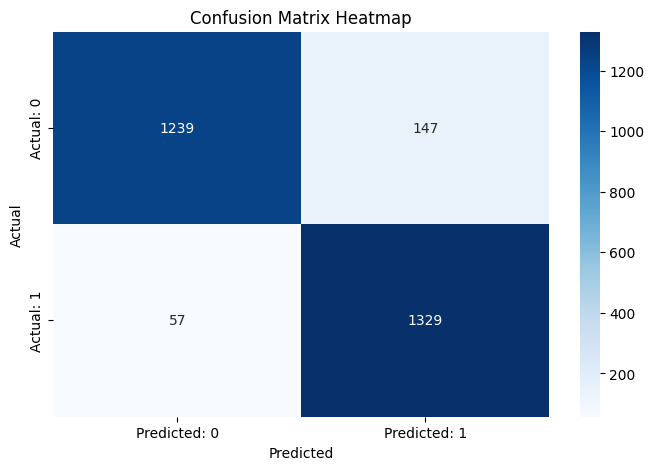

In [110]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
conf_matrix = pd.DataFrame(
    data=cm,
    columns=['Predicted: 0', 'Predicted: 1'],
    index=['Actual: 0', 'Actual: 1']
)

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

mooel = Sequential()
model.add(Dense(512,activation='relu',input_shape=(10,)))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.summary()


c:\Users\Lenovo\.ms-ad\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 526,278 (2.01 MB)

 Trainable params: 515,650 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,628 (41.52 KB)

In [112]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [113]:
from keras.callbacks import EarlyStopping
cb = EarlyStopping(
    monitor='accuracy',
    min_delta=0.0001,
    patience=100,
    mode="auto")

In [114]:
model.fit(X_train, y_train, epochs=50, batch_size=100, validation_split=0.30, callbacks=cb)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7576 - loss: 0.6656 - val_accuracy: 0.9242 - val_loss: 0.4833
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9588 - loss: 0.4216 - val_accuracy: 0.9464 - val_loss: 0.3951
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9770 - loss: 0.3001 - val_accuracy: 0.9485 - val_loss: 0.2439
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9766 - loss: 0.1028 - val_accuracy: 0.9479 - val_loss: 0.2496
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9822 - loss: 0.0714 - val_accuracy: 0.9433 - val_loss: 0.2296
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9839 - loss: 0.0571 - val_accuracy: 0.9490 - val_loss: 0.2132
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9808 - loss: 0.0713 - val_accuracy: 0.9505 - val_loss: 0.2090
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9828 - loss: 0.0582 - val_accuracy: 0.9490 - 

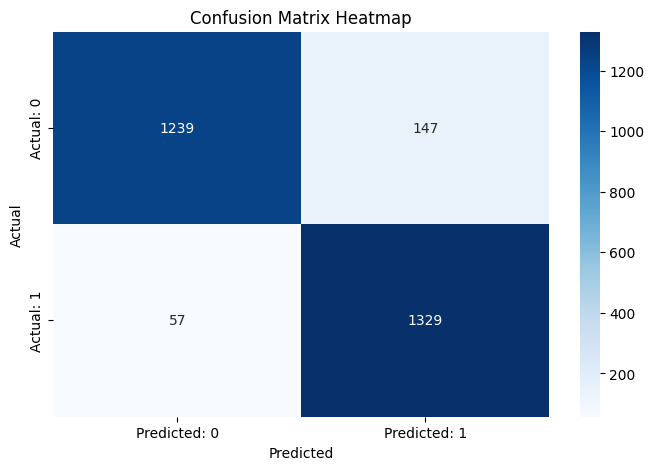

In [115]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
conf_matrix = pd.DataFrame(
    data=cm,
    columns=['Predicted: 0', 'Predicted: 1'],
    index=['Actual: 0', 'Actual: 1']
)

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



In [116]:
#Saving the file
import pickle  # Import the pickle module

# Save the model using pickle
model_filename = 'preprocessor.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)


In [117]:
import pickle

try:
    with open('stroke_random_forest_model.pkl', 'rb') as file:
        model = pickle.load(file)
except EOFError:
    print("Error: The pickle file is empty or corrupted.")

In [118]:
import os
print("File size:", os.path.getsize('stroke_random_forest_model.pkl'))


File size: 6256105


SHAP AND LIME

In [77]:
#Install SHAP

!pip install shap


In [82]:
import pandas as pd
features_names = ['age','hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
X_test = pd.DataFrame(X_test, columns=features_names)


c:\Users\Lenovo\.ms-ad\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray



SHAP Summary Plot:


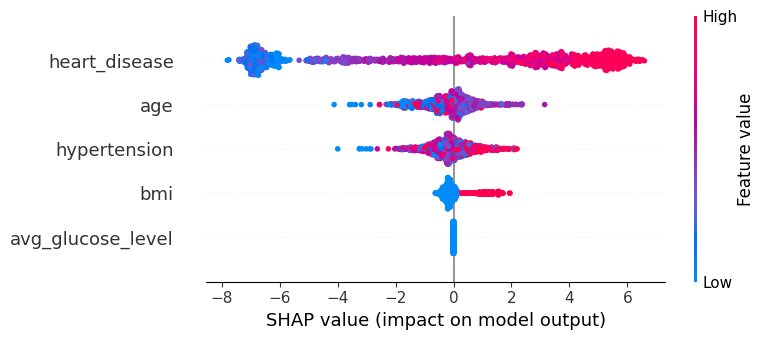

SHAP Feature Importance Plot:


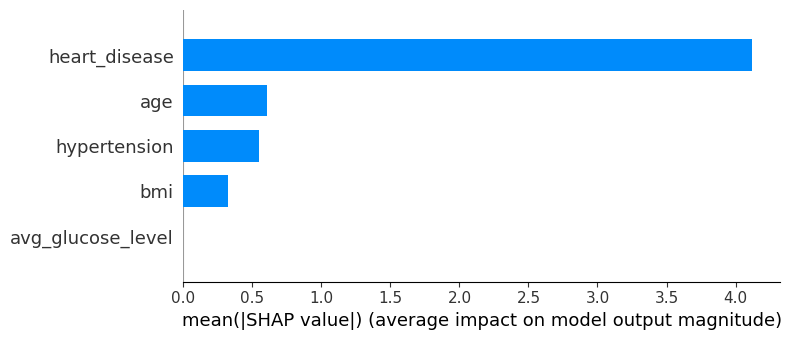

SHAP Force Plot for an Individual Prediction:


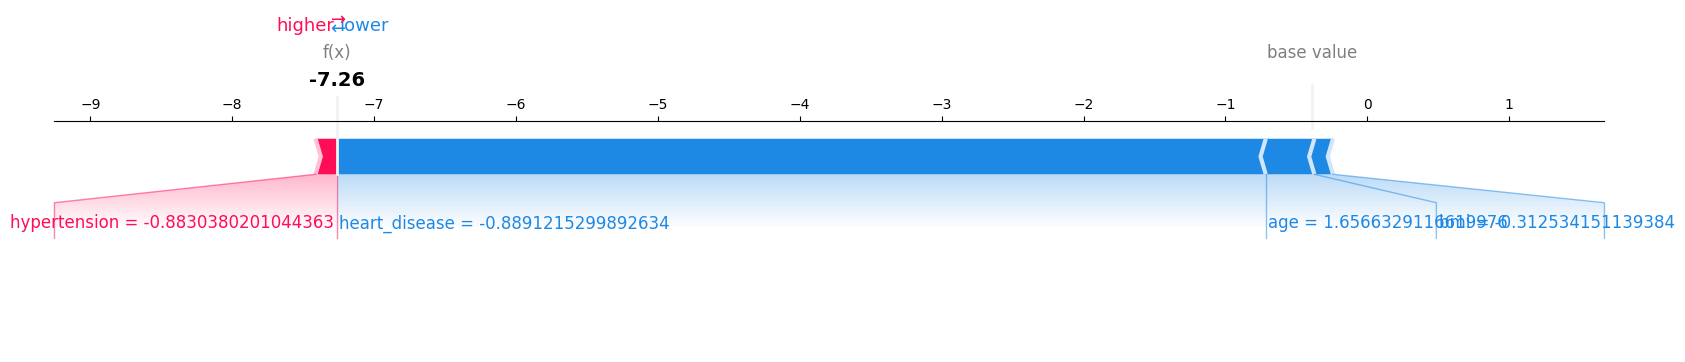

In [83]:
import shap
import matplotlib.pyplot as plt


# Initialize the SHAP explainer
explainer = shap.TreeExplainer(lgbm_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Ensure the SHAP values are a matrix for the positive class
if isinstance(shap_values, list):  # For binary classification, shap_values is a list
    shap_values_positive_class = shap_values[1]  # For the positive class (e.g., 'Stroke')
else:
    shap_values_positive_class = shap_values  # If not a list, use directly

# Plot summary of SHAP values (global interpretability)
print("SHAP Summary Plot:")
shap.summary_plot(shap_values_positive_class, X_test)  # Use positive class SHAP values

# Plot feature importance based on SHAP values
print("SHAP Feature Importance Plot:")
shap.summary_plot(shap_values_positive_class, X_test, plot_type="bar")

# Explain a single prediction (local interpretability)
print("SHAP Force Plot for an Individual Prediction:")
sample_index = 5  # Choose a specific index
shap.force_plot(
    explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value,  # Base value for the positive class
    shap_values_positive_class[sample_index],  # SHAP values for the sample
    X_test.iloc[sample_index],  # Feature values for the sample
    matplotlib=True
)


In [84]:
pip install lime


In [86]:
import pandas as pd
from lime import lime_tabular

# Convert X_train and X_test to pandas DataFrames if they are NumPy arrays
# Replace 'feature_names' with the actual list of feature names
X_train = pd.DataFrame(X_train, columns=features_names)  # Ensure feature_names is defined
X_test = pd.DataFrame(X_test, columns=features_names)

# Initialize the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,  # Use .values to pass as a NumPy array
    feature_names=X_train.columns.tolist(),  # Pass feature names as a list
    class_names=["No Stroke", "Stroke"],  # Modify based on your label names
    mode="classification"
)

# Explain a single prediction
sample_index = 5  # Choose a specific index
exp = explainer.explain_instance(
    data_row=X_test.iloc[sample_index].values,  # Feature values for the sample
    predict_fn=lgbm_model.predict_proba  # Model's prediction probabilities
)

# Visualize the explanation
print("LIME Explanation for an Individual Prediction:")
exp.show_in_notebook(show_table=True)

# Save the explanation as an HTML file (optional)
exp.save_to_file("lime_explanation.html")


LIME Explanation for an Individual Prediction:
